In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Trump, Twitter, and Text

Work with Twitter data in order to analyze Donald Trump's tweets.


In [2]:
# Run this cell to set up
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Before we start ##
All data is made from real-world phenomena, be it the movement of the planets, animal behavior, or human bodies and activities. Working with data always has a bearing back on how human beings know and act in the world. The dataset that you're about to work with in this homework consists of a compilation of President Trump's Tweets. It's important to acknowledge that these Tweets are more than just data -- they're the means by which the President expresses his opinions, performs public and foreign policy, and shapes the lives of people in the US and all over the world. More fundamentally, these Tweets are a powerful form of speech that is particularly significant on the eve of the 2020 US Presidential Election. We recognize that working with this data now, even in the context of a technical exercise, is not a neutral activity and may create difficult feelings in students. We encourage you to observe what you may be experiencing and invite you to consider these dimensions of data science work alongside your technical lessons and we're glad to discuss these issues together in section.

## Disclaimer about `sns.distplot()`

I'll be using a slightly older version of seaborn, which does not support the new `displot` method. We will heavily rely on `distplot` (with a `t`). As you may have noticed in lab 5, use of the `distplot` function triggers a deprecation warning to notify the user that they should replace all deprecated functions with the updated version. Generally, warnings should not be suppressed but we will do so in this assignment to avoid cluttering.

See the seaborn documentation on [distributions](https://seaborn.pydata.org/tutorial/distributions.html) and [functions](https://seaborn.pydata.org/tutorial/function_overview.html) for more details.

In [3]:
# Run this cell to suppress all DeprecationWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---
# Importing the Data

I'll use the `fetch_and_cache` utility to download the dataset. 

In [4]:
# Download the dataset
from ds100_utils import fetch_and_cache
data_url = 'http://www.ds100.org/fa19/assets/datasets/hw4-realdonaldtrump_tweets.json.zip'
file_name = 'hw4-realdonaldtrump_tweets.json.zip'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

Using version already downloaded: Thu Oct  8 18:08:24 2020
MD5 hash of file: 664c6f85e94ea09e1507eedd7626adc5
Located at data/hw4-realdonaldtrump_tweets.json.zip


Now that we've downloaded the tweets, let's unzip them and load them into our notebook. Run the cell below to unzip and read tweets from the json file into a list named `all_tweets`.

In [5]:
# Unzip the dataset
my_zip = zipfile.ZipFile(dest_path, 'r')
with my_zip.open('hw4-realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

Here is what a typical tweet from `all_tweets` looks like:

In [6]:
from pprint import pprint # to get a more easily-readable view.
pprint(all_tweets[-1])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 18:40:18 +0000 2018',
 'display_text_range': [0, 174],
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 52115,
 'favorited': False,
 'full_text': 'Just spoke with the Crown Prince of Saudi Arabia who totally '
              'denied any knowledge of what took place in their Turkish '
              'Consulate. He was with Secretary of State Mike Pompeo...',
 'geo': None,
 'id': 1052268011900555265,
 'id_str': '1052268011900555265',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 13493,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'user': {'contributors_enabled': False,
  

Someone might be interested in the amount of "favorites" the President gathers per tweet, and what kind of tweet generates the most favorites. An institution that might be interested in this kind of analysis could be Trump's employees that are in charge of his re-election campaign. A data analysis of the President's tweent might be interesting because they could determine what kind of content garners the most discussion/conversation, and another reason could be that data analysis could be used so that they can determine what the President should *avoid* doing. 

<!-- END QUESTION -->

## Initializing DataFrame

Constructuing a DataFrame called `trump` containing data from all the tweets stored in `all_tweets`. The index of the DataFrame should be the ID of each tweet (looks something like `907698529606541312`). Columns will be:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

In [7]:
trump = pd.DataFrame.from_dict(all_tweets, dtype = None, columns = None, orient = "columns").set_index('id').loc[:, ['created_at', 'text', 'full_text', 'source', 'retweet_count']].sort_values(by = ['id']) 
trump['text'] = pd.concat([trump['full_text'].dropna(), trump['text'].dropna()]).reindex_like(trump)
trump.rename(columns = {'created_at' : 'time'}, inplace = True)
trump['time'] = pd.to_datetime(trump['time'])
trump = trump.drop(columns = ["full_text"])
trump

,time,text,source,retweet_count
id,,,,
690171032150237184,2016-01-21 13:56:11+00:00,"""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",1059
690171403388104704,2016-01-21 13:57:39+00:00,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",1339
690173226341691392,2016-01-21 14:04:54+00:00,So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",2006
690176882055114758,2016-01-21 14:19:26+00:00,"Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",2266
690180284189310976,2016-01-21 14:32:57+00:00,Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",2886
...,...,...,...,...
1096547516290543617,2019-02-15 23:11:15+00:00,"Great job by law enforcement in Aurora, Illinois. Heartfelt condolences to all of the victims and their families. America is with you!","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",21296
1096812333333184512,2019-02-16 16:43:32+00:00,https://t.co/f6Jd2FzayZ,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",17134
1096856815810342912,2019-02-16 19:40:18+00:00,https://t.co/nJORBjwint,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",29569


---
# Part 2: Tweet Source Analysis

In the following, I'll find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [8]:
trump['source'].unique()

array(['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

## Cleaning

Notice how sources like "Twitter for Android" or "Instagram" are surrounded by HTML tags. I'll clean up the `source` field by removing the HTML tags from each `source` entry.

In [9]:
trump['source'] = trump['source'].str.replace("<.*?>", '')

In the following plot, we see that there are two device types that are more commonly used than others.

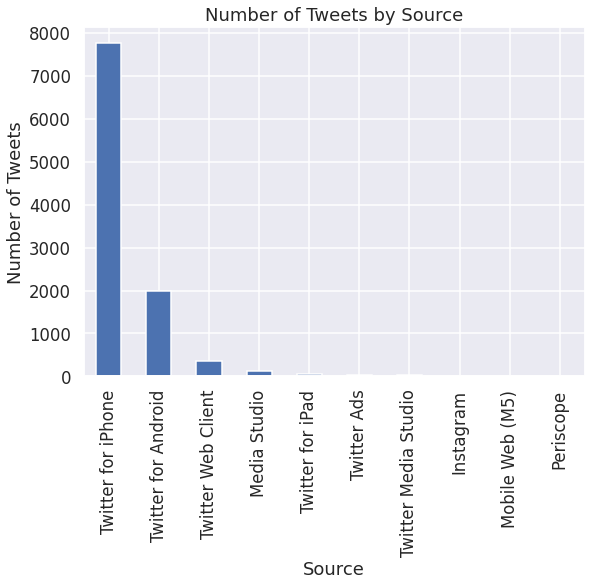

In [10]:
plt.figure(figsize=(8, 6))
trump['source'].value_counts().plot(kind="bar")
plt.xlabel('Source')
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

## Tweet Date Distribution

Now that we have cleaned up the `source` field, let's look at which device Trump has used over the entire time period of this dataset.

To examine the distribution of dates I will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from this [link](https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years))

In [11]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)


I'll use `sns.distplot` to overlay the distributions of Trump's 2 most frequently used web technologies over the years. 

Text(0.5, 1.0, 'Distribution of Tweet Sources Over Years')

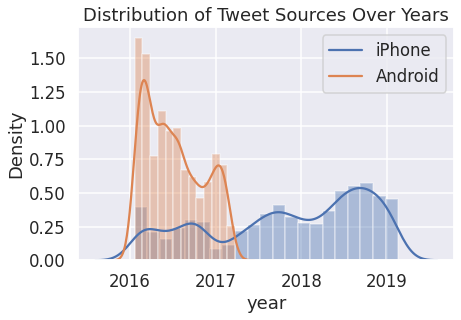

In [12]:
iPhone = trump[trump['source'] == 'Twitter for iPhone']['year']
Android = trump[trump['source'] == 'Twitter for Android']['year']
sns.distplot(iPhone)
sns.distplot(Android)
plt.legend(['iPhone', 'Android'])
plt.title('Distribution of Tweet Sources Over Years')


## Differences In Trump's Behavior


Is there a difference between Trump's tweet behavior across these devices? I'll attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android device come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets).

In [13]:
for tweet in all_tweets[:3]:
    print(tweet['created_at'])

Wed Oct 12 14:00:48 +0000 2016
Wed Oct 12 13:46:43 +0000 2016
Wed Oct 12 12:59:05 +0000 2016


I'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [14]:
trump['est_time'] = (
    trump['time'].dt.tz_convert("EST") # Convert to Eastern Time
)
trump.head()

,time,text,source,retweet_count,year,est_time
id,,,,,,
690171032150237184,2016-01-21 13:56:11+00:00,"""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",Twitter for Android,1059,2016.054645,2016-01-21 08:56:11-05:00
690171403388104704,2016-01-21 13:57:39+00:00,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",Twitter for Android,1339,2016.054645,2016-01-21 08:57:39-05:00
690173226341691392,2016-01-21 14:04:54+00:00,So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,Twitter for Android,2006,2016.054645,2016-01-21 09:04:54-05:00
690176882055114758,2016-01-21 14:19:26+00:00,"Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",Twitter for Android,2266,2016.054645,2016-01-21 09:19:26-05:00
690180284189310976,2016-01-21 14:32:57+00:00,Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,Twitter for Android,2886,2016.054645,2016-01-21 09:32:57-05:00


### When Did Trump Tweet? 
Added a column called `hour` to the `trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [15]:
trump['hour'] = trump['est_time'].dt.hour + (trump['est_time'].dt.minute / 60) + (trump['est_time'].dt.second)/3600


### Histogram: When did Trump Tweet?

Using seaborn `distplot` function to examine the distribution over hours of the day in eastern time that Trump tweets on each device for the 2 most commonly used devices.

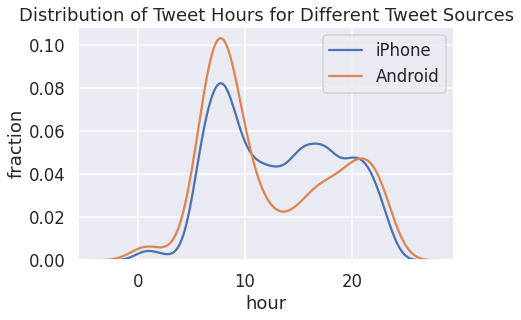

In [16]:
iPhone_time = trump[trump['source'] == 'Twitter for iPhone']['hour']
Android_time = trump[trump['source'] == 'Twitter for Android']['hour']
sns.distplot(iPhone_time, label = 'iPhone', hist = False)
sns.distplot(Android_time, label = "Android", hist = False)
plt.title("Distribution of Tweet Hours for Different Tweet Sources")
plt.ylabel("fraction") 
plt.legend(['iPhone', 'Android'])



### Android vs. iPhone: Does it matter?

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Let's see if this information significantly changes our plot. 

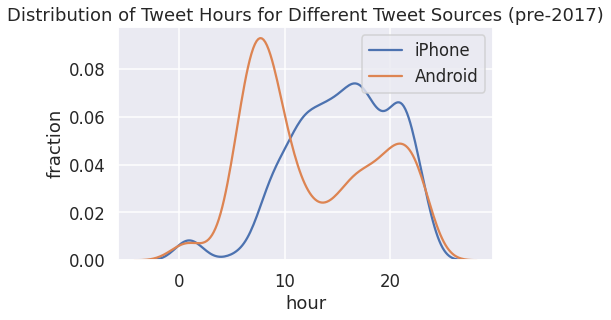

In [17]:
iPhone_time = trump[(trump['source'] == 'Twitter for iPhone') & (trump['year'] < 2017) ]['hour']
Android_time = trump[(trump['source'] == 'Twitter for Android') & (trump['year'] < 2017)]['hour']
sns.distplot(iPhone_time, label = 'iPhone', hist = False)
sns.distplot(Android_time, label = "Android", hist = False)
plt.title("Distribution of Tweet Hours for Different Tweet Sources (pre-2017)")
plt.ylabel("fraction") 
plt.legend(['iPhone', 'Android'])



### Staff vs. Trump

During the campaign, it was theorized that Donald Trump's tweets from Android devices were written by him personally, and the tweets from iPhones were from his staff. Does your figure give support to this theory? What kinds of additional analysis could help support or reject this claim?

<!--
BEGIN QUESTION
name: q4d
points: 1
manual: true
-->

There is a large different between usages of Android and iPhone soures before 2017 and after 2017. This coincides with the election, and beforeand after Trump became president. Before 2017 (when he was in office), Trump's tweets that came from Android source mostly were in the morning, while his iPhone tweets came mostly from the afternoon. This could mean that the tweets were written by different people, since these habits are different. More analysis that could be observed are the number of tweets written by each source, such as Android and iPhone. If the number of one source is far greater than the other, than we know that his staff has obviously been working on one of the sources. 

<!-- END QUESTION -->



---
# Part 3: Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

I will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. The following cell shows the first few rows of the lexicon:

In [18]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



As you can see, the lexicon contains emojis too! Each row contains a word and the *polarity* of that word, measuring how positive or negative the word is.

<!-- BEGIN QUESTION -->

## VADER Scoring

The creators of VADER describe the tool’s assessment of polarity, or “compound score,” in the following way:

“The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.”

As you can see, VADER doesn't "read" sentences, but works by parsing sentences into words assigning a preset generalized score from their testing sets to each word separately. 

VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training set of data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK). Each word in each dataset was reviewed and rated by at least 20 trained individuals who had signed up to work on these tasks through Mechanical Turk. 


VADER might fail to recognize the nuances of human speech, such as sarcasm or irony. Circumstances such as denouncing the actions of a terrorist group could aggregate to a negative score, while the sentence was meant to convey a positive attitude on dealing with terrorists. 



### VADER Lexicon Scoring

Reading the `vader_lexicon.txt` into a DataFrame called `sent`. The index of the DataFrame are the words in the lexicon. `sent` has one column named `polarity`, storing the polarity of each word.


In [19]:
sent = pd.read_csv('vader_lexicon.txt', names = ['words', 'polarity', 'x', 'y'], sep = "\t").set_index('words').drop(columns = ['x', 'y'])
sent.head()

,polarity
words,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


### Trump Tweet Sentiment

Now I'll use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, I'll lowercase the text in the tweets since the lexicon is also lowercase.

In [20]:
trump['text'] = trump['text'].str.lower()
trump.head()

,time,text,source,retweet_count,year,est_time,hour
id,,,,,,,
690171032150237184,2016-01-21 13:56:11+00:00,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",Twitter for Android,1059,2016.054645,2016-01-21 08:56:11-05:00,8.936389
690171403388104704,2016-01-21 13:57:39+00:00,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",Twitter for Android,1339,2016.054645,2016-01-21 08:57:39-05:00,8.960833
690173226341691392,2016-01-21 14:04:54+00:00,so sad that @cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma. dishonest reporting!,Twitter for Android,2006,2016.054645,2016-01-21 09:04:54-05:00,9.081667
690176882055114758,2016-01-21 14:19:26+00:00,"sad sack @jebbush has just done another ad on me, with special interest money, saying i won't beat hillary - i will. but he can't beat me.",Twitter for Android,2266,2016.054645,2016-01-21 09:19:26-05:00,9.323889
690180284189310976,2016-01-21 14:32:57+00:00,low energy candidate @jebbush has wasted $80 million on his failed presidential campaign. millions spent on me. he should go home and relax!,Twitter for Android,2886,2016.054645,2016-01-21 09:32:57-05:00,9.549167


### More Data Cleaning

I'll get rid of punctuation since it will cause us to fail to match words. The new column called `no_punc` in the `trump` DataFrame is the lowercased text of each tweet with all punctuation replaced by a single space. I consider punctuation characters to be *any character that isn't a Unicode word character or a whitespace character*.

In [21]:
punct_re = r'[^\w\s]'
trump['no_punc'] = trump['text'].str.replace(punct_re, ' ')

### Tidy Format

Now, I'll convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. I'll use the `no_punc` column of `trump` to create a table called `tidy_format`. The index of the table are the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

In [22]:
tidy_format = trump['no_punc'].str.split(expand = True).stack().to_frame().rename(columns = {'level_1': 'num', 0: 'word'}).reset_index(level = 1)
tidy_format

,level_1,word
id,,
690171032150237184,0,bigop1
690171032150237184,1,realdonaldtrump
690171032150237184,2,sarahpalinusa
690171032150237184,3,https
690171032150237184,4,t
...,...,...
1096926633708134406,43,the
1096926633708134406,44,form
1096926633708134406,45,of


### Trump Tweet Polarity

I'll join the table with the lexicon table to find the polarity of each of Trump's tweets.

The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet. This column is added to the 

**Hints:** 
* You will need to merge the `tidy_format` and `sent` tables and group the final answer.
* If certain words are not found in the `sent` table, set their polarities to 0.

<!--
BEGIN QUESTION
name: q5g
points: 2
-->

In [24]:
polar = tidy_format.merge(sent, left_on = "word", right_on = "words", how = "left", right_index = True).fillna(0).drop(columns = ['level_1']).groupby('id').sum()
polar
trump['polarity'] = polar


Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Below I wanted to see the most positive and most negative tweets from Trump in your dataset:

In [25]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

In [26]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new


## Tweet Distributions

Now, I'll look at the distributions of sentiments for tweets containing certain keywords.

I'll create a single plot showing both the distribution of tweet sentiments for tweets containing `nytimes`, as well as the distribution of tweet sentiments for tweets containing `fox`.


Text(0.5, 1.0, "Frequency of Polarity of Trump's Tweets")

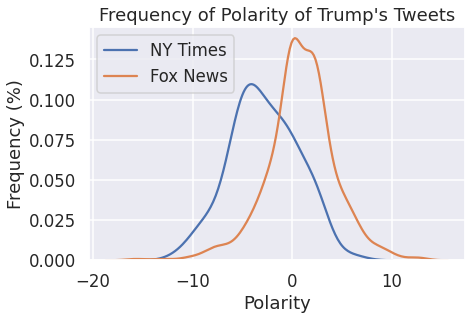

In [27]:
trump
nytimes = trump[trump['text'].str.contains('nytimes')].drop(columns = ['time', 'text', 'source', 'retweet_count', 'year', 'est_time', 'hour', 'no_punc'])
fox = trump[trump['text'].str.contains('fox')].drop(columns = ['time', 'text', 'source', 'retweet_count', 'year', 'est_time', 'hour', 'no_punc'])
sns.distplot(nytimes, label = "NY Times", hist = False)
sns.distplot(fox, label = "Fox News", hist = False)
plt.legend()
plt.xlabel("Polarity")
plt.ylabel("Frequency (%)")
plt.title("Frequency of Polarity of Trump's Tweets")


It seems that when NY Time has been mentioned, it is more often negative in polarity. In comparison, Fox News has been mentioned more often with positive connatations according to Vader.



## Hashtags

Is there a difference in sentiment for tweets with hashtags and those without?

### Using Regex to detect characters

- A tweet is a retweet if it has the string 'rt' anywhere in the tweet if it is preceeded and followed by a non-word character (the start and end of the string count as non-word characters).
- A tweet has a hashtag if it has the character '#' anywhere in the tweet followed by a letter.
- A tweet contains a link or a picture if it has `http` anywhere in the tweet

In [28]:
rt_re = r'\brt\b'
hash_link_re = r'#\b|http\b'

### Hashtags: Tweet Sentiment Distribution

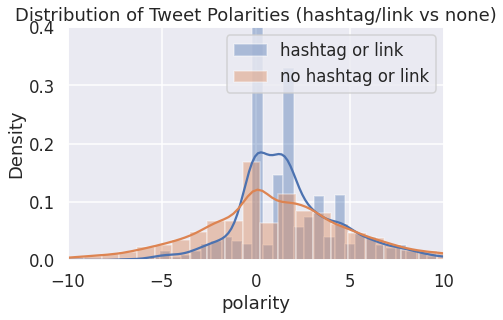

In [29]:
sns.distplot(trump[trump['text'].str.contains(hash_link_re)]['polarity'],label='hashtag or link');
sns.distplot(trump[~trump['text'].str.contains(hash_link_re)]['polarity'],label='no hashtag or link');
plt.xlim(-10, 10);
plt.ylim(0, 0.4);
plt.title('Distribution of Tweet Polarities (hashtag/link vs none)');
plt.legend();

Both of the graphs are mostly unimodal, but one, the distribution of the "hashtag or link" category have higher densities in the positive areas, and less density in negative polarity. The hashtag/no link density curve contains polarities of 0 & 2/3 with much higher frequency than the no hashtag or link curve. Overall, the two curves show that more tweets with hashtags or links have more positive polarities compared to tweets with no hashtags or links. 